In [25]:
# Import necessary libraries
import tensorflow as tf
from keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.datasets import fashion_mnist
from keras.utils import to_categorical
from keras.utils import plot_model
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve, auc
)

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Dataset: https://www.tensorflow.org/datasets/catalog/mnist

Dataset : https://www.tensorflow.org/datasets/catalog/kmnist


In [54]:
# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Function to plot the distribution of labels in the dataset
def plot_label_distribution(labels, dataset_name):
    unique, counts = np.unique(labels, return_counts=True)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=unique, y=counts)
    plt.title(f'{dataset_name} Label Distribution')
    plt.xlabel('Digits')
    plt.ylabel('Frequency')
    plt.show()

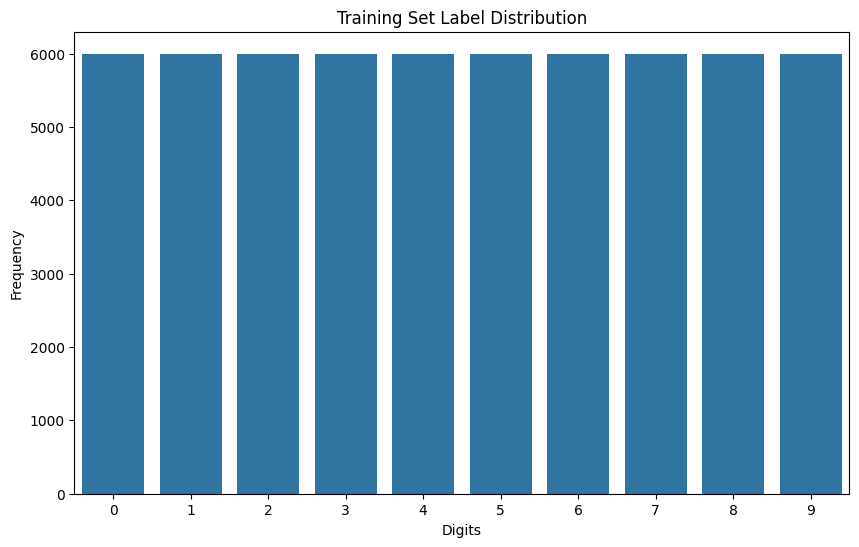

In [55]:
# Plot the distribution for training and test sets
plot_label_distribution(train_labels, 'Training Set')

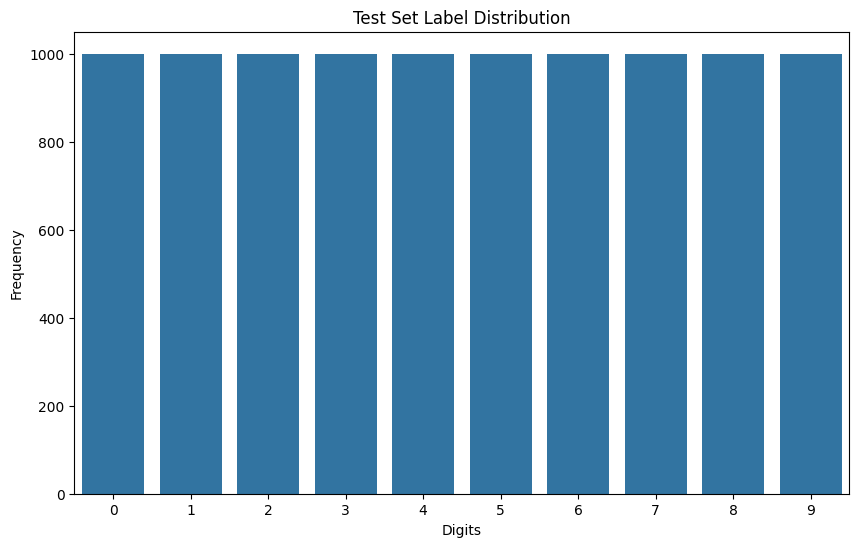

In [56]:
plot_label_distribution(test_labels, 'Test Set')

In [57]:
# Function to show random sample images from the dataset
def show_random_images(images, labels, num_samples=10):
    plt.figure(figsize=(10, 4))
    indices = np.random.choice(np.arange(len(images)), num_samples, replace=False)
    for i, idx in enumerate(indices):
        plt.subplot(2, 5, i + 1)
        plt.imshow(images[idx], cmap='gray')
        plt.title(f'Label: {labels[idx]}')
        plt.axis('off')
    plt.tight_layout()
    plt.show()

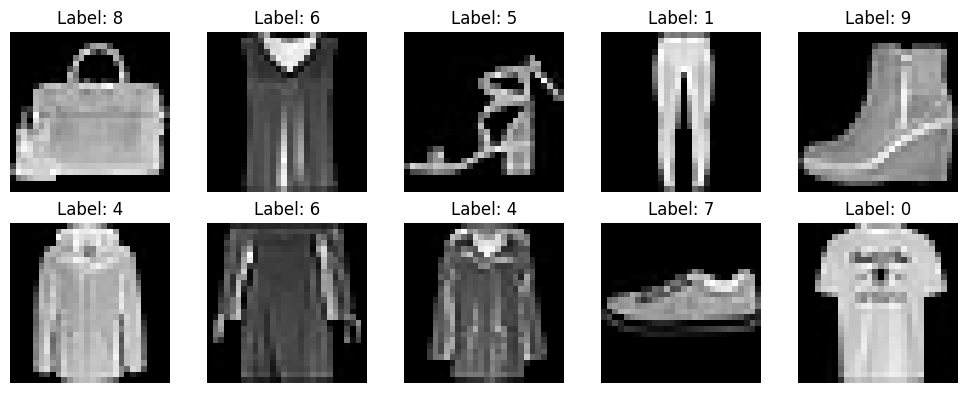

In [58]:
# Show some random sample images from the training set
show_random_images(train_images, train_labels)

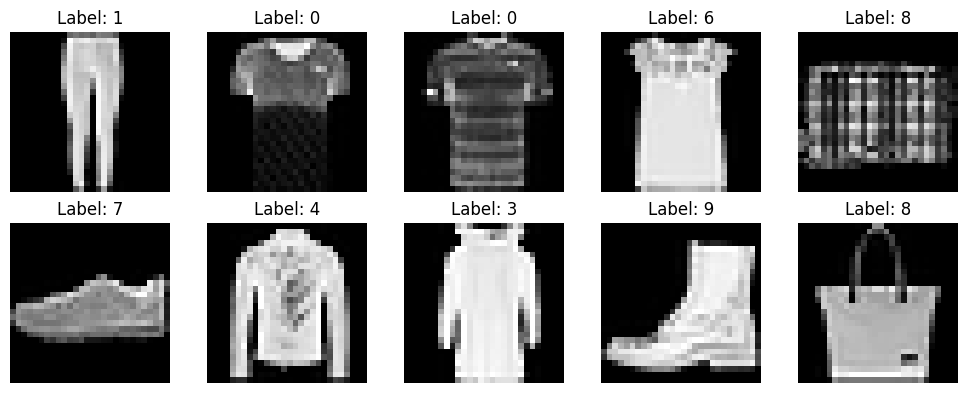

In [74]:
# Show some random sample images from the training set
show_random_images(test_images, test_labels)

Matrix Representation of Digit 8:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0 106 166 173 149  48
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   2   0   5 223 194  77  40  86 222
  157   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   1   0   0 193  88   0   0   0   0   0
  181  85   0   7   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   5   0 103 131   0   2   0   0   3   0
    0 199   0   0   1   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 209  40   0   1   1   0   0   1
    0 153  81   0   2   0   0   0   0   0]
 [  0   0   0   0   0   0   0   2   0   0 175   9   0   1   0   1   0   0
    0 153 138   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   5   0   0 193  25   0   1   0   3   0   0
    0 156 147   0   3   0   0   0   0   0]
 [  0   0   0   0   0   0   0   3   0   0 191  62   0   4   0   0   0   0
    0 161 137   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 

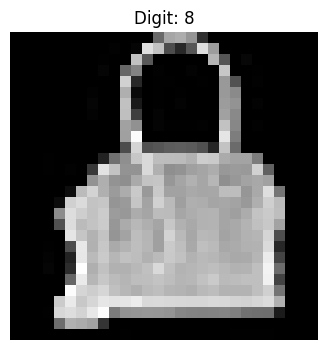

In [75]:
# Function to show the matrix representation of a single image
def show_matrix_representation(image, label):
    print(f'Matrix Representation of Digit {label}:')
    print(image)

    # Visualize the matrix representation
    plt.figure(figsize=(4, 4))
    plt.imshow(image, cmap='gray')
    plt.title(f'Digit: {label}')
    plt.axis('off')
    plt.show()

# Display the matrix representation of a single image
random_idx = np.random.randint(0, len(train_images))
show_matrix_representation(train_images[random_idx], train_labels[random_idx])

In [76]:
# Preprocessing: Reshape and normalize
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

# One-hot encode the labels
train_labels_cat = to_categorical(train_labels)
test_labels_cat = to_categorical(test_labels)

In [77]:
# Define the LeNet-5 architecture
model = models.Sequential()

# C1: Convolutional Layer (6 filters of size 5x5, stride 1)
model.add(layers.Conv2D(6, (5, 5), activation='tanh', input_shape=(28, 28, 1)))

# S2: Subsampling Layer (Average Pooling with size 2x2, stride 2)
model.add(layers.AveragePooling2D((2, 2), strides=2))

# C3: Convolutional Layer (16 filters of size 5x5)
model.add(layers.Conv2D(16, (5, 5), activation='tanh'))

# S4: Subsampling Layer (Average Pooling with size 2x2, stride 2)
model.add(layers.AveragePooling2D((2, 2), strides=2))

# C5: Fully Connected Convolutional Layer (120 filters of size 1x1) # Changed filter size to 1x1
model.add(layers.Conv2D(120, (1, 1), activation='tanh'))

# Flatten the output to feed into fully connected layers
model.add(layers.Flatten())

# F6: Fully Connected Layer with 84 units
model.add(layers.Dense(84, activation='tanh'))

# Output layer: 10 units (for 10 classes in MNIST), softmax activation
model.add(layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print the model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 24, 24, 6)         156       
                                                                 
 average_pooling2d_2 (Avera  (None, 12, 12, 6)         0         
 gePooling2D)                                                    
                                                                 
 conv2d_4 (Conv2D)           (None, 8, 8, 16)          2416      
                                                                 
 average_pooling2d_3 (Avera  (None, 4, 4, 16)          0         
 gePooling2D)                                                    
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 120)         2040      
                                                                 
 flatten_1 (Flatten)         (None, 1920)             

In [78]:
# Create the plot of the model architecture
plot_model(model, show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [80]:
# Train the model
history = model.fit(
    train_images,
    train_labels_cat,
    epochs=10,
    batch_size=64,
    validation_split=0.2
    )

Epoch 1/10
 93/750 [==>...........................] - ETA: 5s - loss: 0.3094 - accuracy: 0.8876

KeyboardInterrupt: 

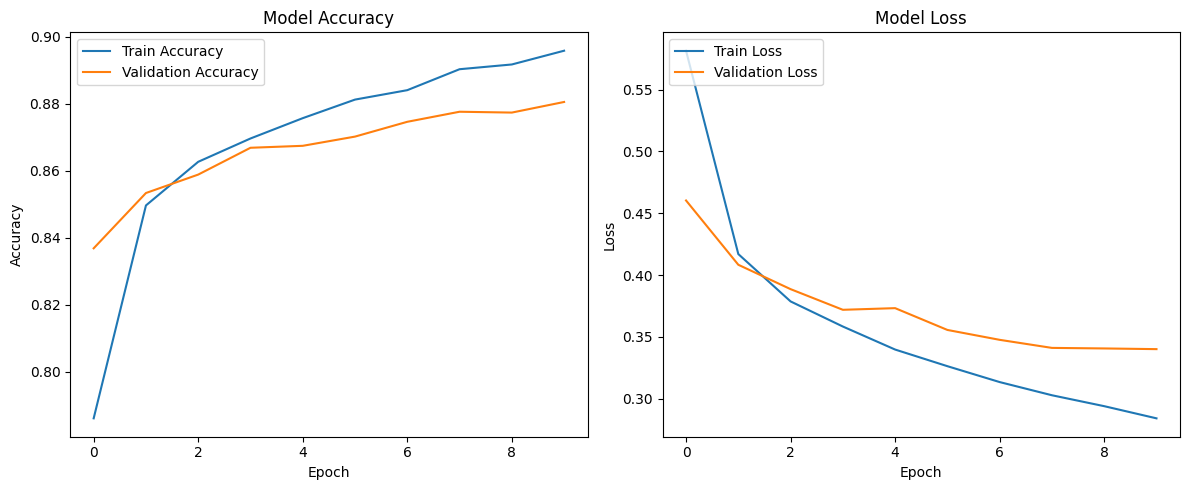

In [37]:
# Plot training & validation accuracy values
def plot_training_history(history):
    # Plot accuracy
    plt.figure(figsize=(12, 5))

    # Subplot 1: Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')

    # Subplot 2: Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')

    # Show plot
    plt.tight_layout()
    plt.show()

# Call the function to plot accuracy and loss
plot_training_history(history)

In [38]:
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(test_images, test_labels_cat)
print(f'Test accuracy: {test_acc:.4f}')

313/313 [==============================] - 1s 3ms/step - loss: 0.3625 - accuracy: 0.8675
Test accuracy: 0.8675


In [39]:
# Predictions on test data
predictions = model.predict(test_images)
predicted_classes = np.argmax(predictions, axis=1)

# Confusion Matrix
conf_matrix = confusion_matrix(test_labels, predicted_classes)
print("Confusion Matrix:\n", conf_matrix)

313/313 [==============================] - 1s 3ms/step
Confusion Matrix:
 [[849   1  12  27   5   0  96   1   9   0]
 [  5 972   1  17   2   0   2   0   1   0]
 [ 24   0 826  12  71   0  63   0   4   0]
 [ 35  32  13 870  24   0  21   0   5   0]
 [  1   2 133  46 754   0  61   0   3   0]
 [  0   0   1   1   0 926   0  46   4  22]
 [170   1  97  27  76   0 613   0  16   0]
 [  0   0   0   0   0   8   0 954   1  37]
 [ 10   1   8  10   3   1   9   5 953   0]
 [  0   0   0   0   0   9   0  32   1 958]]


In [40]:
# Classification Report (Precision, Recall, F1 Score)
class_report = classification_report(test_labels, predicted_classes)
print("\nClassification Report:\n", class_report)


Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.85      0.81      1000
           1       0.96      0.97      0.97      1000
           2       0.76      0.83      0.79      1000
           3       0.86      0.87      0.87      1000
           4       0.81      0.75      0.78      1000
           5       0.98      0.93      0.95      1000
           6       0.71      0.61      0.66      1000
           7       0.92      0.95      0.94      1000
           8       0.96      0.95      0.95      1000
           9       0.94      0.96      0.95      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



In [41]:
# Misclassification Rate
miss_class_rate = 1 - test_acc
print(f'Misclassification Rate: {miss_class_rate:.4f}')

Misclassification Rate: 0.1325


ROC AUC Score: 0.9890


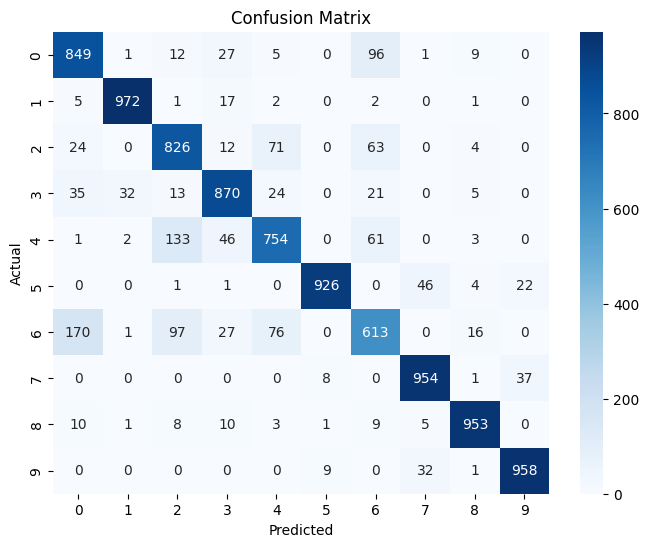

In [42]:
# ROC AUC for each class
auc_roc = roc_auc_score(test_labels_cat, predictions, multi_class="ovr")
print(f'ROC AUC Score: {auc_roc:.4f}')

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

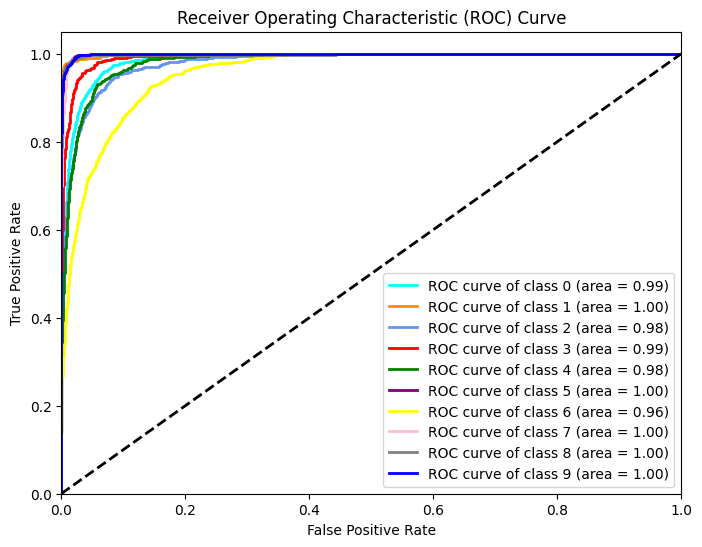

In [43]:
# AUC-ROC curve for each class
fpr = {}
tpr = {}
roc_auc = {}

for i in range(10):
    fpr[i], tpr[i], _ = roc_curve(test_labels_cat[:, i], predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))
colors = ['aqua', 'darkorange', 'cornflowerblue', 'red', 'green', 'purple', 'yellow', 'pink', 'gray', 'blue']
for i in range(10):
    plt.plot(fpr[i], tpr[i], color=colors[i], lw=2, label=f'ROC curve of class {i} (area = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()